# Examen 1: Métodos computacionales.

## Profesor: Hernán Salinas
### Universidad de Antioquia


El examen consta de 7 puntos, cada uno de igual valor, el uso de herramientas de IA no esta permitido. Puede usar la documentacion de scipy, numpy, matplotlib.

La entrega se realiza a través del github del curso.


#### Examen

Una esfera de masa $m$ es lanzada desde la superficie de la tierra con velocidad $\vec{v_0}$. Las fuerzas que actúan sobre la bolita son: el peso $m\vec{g}$, y la fuerza de rozamiento $\vec{f}=-mb\vec{v}_0$ que el  aire ejerce sobre la bolita. Un digrama de cuerpo libre es esquematizado en la siguiente figura.

![Movimiento parabolico](http://www.sc.ehu.es/sbweb/fisica/dinamica/stokes2/stokes1.gif)

Para dar solución al movimiento de la bolita, se debe plantear las ecuaciones de movimiento desde la segunda ley de Newton y después solucionarla para encontrar la ecuaciones de posición y velocidad. Su tarea será determinar el valor del alcance máximo para diferentes ángulos de lanzamiento. Para ello lea detenidamente lo siguiente:  

Las **ecuaciones de movimiento** de la bolita vienen dadas por:
\begin{equation}
m\frac{\mathrm{d}v_x}{\mathrm{d}t} = - mbv_x
\end{equation}


\begin{equation}
m\frac{\mathrm{d}v_y}{\mathrm{d}t} = - mg-mbv_y
\end{equation}


donde:

$v_{0x}=v_0\cos \theta$,  $v_{0y}=v_0\sin \theta$,  $b$ el coeficiente de rozamiento con el aire, y $g$ la aceleración de la gravedad


La solución a las ecuaciones anteriores para la **posición ($x$, $y$) y la velocidad ($v_x$, $v_y$)**  son:


\begin{equation}
x =  \frac{v_{0x}}{b}\left( 1-e^{-bt} \right)
\end{equation}

\begin{equation}
y =  \frac{1}{b}\left( \frac{g}{b}+v_{0y}\right)(1-e^{-bt})-\frac{g}{b}t
\end{equation}


\begin{equation}
v_x = v_{0x}e^{-bt}
\end{equation}

\begin{equation}
v_y = \left(\frac{g}{b}+v_{0y} \right) e^{-bt}-\frac{g}{b}
\end{equation}



**Alcance máximo**

El tiempo asociado al alcance máximo del proyectil se da cuando $x=R$, despejando de la ecuación para $x$ el tiempo, se tiene que:

\begin{equation}
t_v=-\frac{1}{b} \ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

Reemplanzando en la ecuación para $y$ obtenemos que:
\begin{equation}
y =\left(\frac{g}{b} + v_{0y}  \right) \frac{R}{v_{0x}}+\frac{g}{b^2}\ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

El alcance máximo R, estará deteminado cuando $y=0$ en la anterior ecuación. Notese que es una ecuación trascendental. Su tarea será determinar el valor de R para diferentes ángulos de lanzamiento, para ello realice lo siguiente:





1. Construir una función de python paramétrica para determinar el valor de R.
$y = f(R, \theta, v_{ox},v_{oy},b,g)$



2. Asumiento que la bolita es lanzada con una rapidez de
$v_0=55\mathrm{m}/\mathrm{s}$ y un ángulo de $45^{\circ}$ respecto a la horizontal, $b=0.005$ y $g=9.8\mathrm{m}/\mathrm{s^2}$, determine el alcance máximo. Emplee el método que desee.


3. Valide el resutado anterior, con un método diferente al que empleo en el apartado anterior y además, determine el tiempo de vuelo $t_v$.  


4. Construya una gráfica de $x$ vs $t$, $y$ vs $t$, $x$ vs $y$. Asegurese de  no superar en las trayectorias los tiempos establecidos por el  tiempo de vuelo $t_v$.

Ahora,  vamos a mostrar la trayectoria para múltiples ángulos de lanzamiento.

5. Suponiendo,  $b=0.009$, $v_0 = 40\mathrm{m}/\mathrm{s}$ y  $\theta$ entre $0<\theta<90^{\circ}$ en pasos de $5^{\circ}$:
```python
theta=np.arange(0, 90, 5)
theta=np.deg2rad(theta)
```


generalice el resultado del punto  número 2  para determinar el conjunto de valores de R asociados a cada ángulo. Con lo anterior determine los tiempos de vuelo.

6. Realice un gráfico de $R$ vs $t_v$

7. Finalmente, construya todas las trayectorias ($y$ vs $x$) para cada ángulo $\theta$.













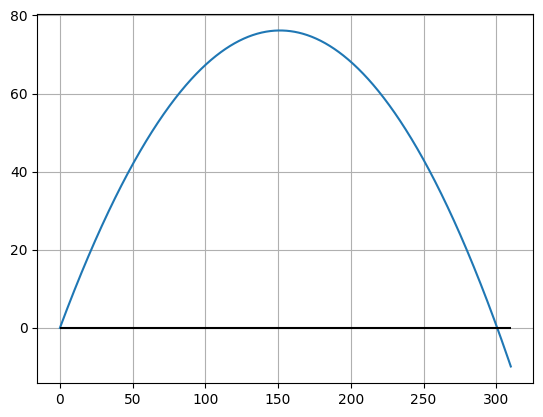

In [20]:
import numpy as np
import matplotlib.pyplot as plt

g = 9.8
v0 = 55
vx = v0*np.cos(0.785398)
vy = v0*np.sin(0.785398)
b=0.005
t=0.785398
#punto1
def f(R,t,vx,vy,b,g):

  return ((g/b) + vy)*(R/vx) + g/(b**2) * np.log(1-(R*b/vx))

R = np.linspace(0, 310,1000)
Rf = np.zeros(len(R))

for i in range(len(R)):
  Rf[i]= f(R[i],0.785398,vx,vy,b,g)

#print(Rf)
plt.plot(R,Rf)
plt.hlines(0,0,310,color='black') #Se busca donde corta la grafica del movimiento con el eje x, para averiguar el valor de R
plt.grid()
plt.show()

In [21]:
#Punto 2
# En la gráfica se observa que el alcance máximo esta al rededor de 300, ahora se procede a mostrar que ese es efectivamente el valor.

#Solucionando por medio del método de la secaante

def secante(f,p0,p1,resolucion):


    pn_1=p1
    pn_2=p0

    res=resolucion

    while abs(pn_1-pn_2) > res:
        pn=pn_1-(f(pn_1,0.785398,vx,vy,b,g)*(pn_1-pn_2))/(f(pn_1,0.785398,vx,vy,b,g)-f(pn_2,0.785398,vx,vy,b,g))

        pn_2 = pn_1
        pn_1 = pn

    return pn

print(secante(f,200,400,1e-12))

300.69207796771957


In [31]:
#Punto3
#Ahora solucionando por método de Biseccion

def biseccion(f,a,b,tol):
    if f(a,0.785398,vx,vy,b,g)*f(b,0.785398,vx,vy,b,g)>=0:
        return 'Error f(a) y f(b) deben tener signo contrario'

    p=(a+b)/2


    while abs(f(p,0.785398,vx,vy,b,g))>tol:

        if f(a,0.785398,vx,vy,b,g)*f(p,0.785398,vx,vy,b,g)<0:
            b=p
        if f(p,0.785398,vx,vy,b,g)*f(b,0.785398,vx,vy,b,g)<0:
            a=p

        p=(a+b)/2


    return p

print(biseccion(f,200,400,1e-10))

300.0


<ipython-input-20-48f05b0a15fb>:13: RuntimeWarning: invalid value encountered in log
  return ((g/b) + vy)*(R/vx) + g/(b**2) * np.log(1-(R*b/vx))


In [32]:
#Tiempo de vuelo

def tv(R,vx,b):
  return -(1/b)*np.log(1-(R*b/vx))

print(tv(300,vx,b)) #Se pone R=300 pues los métodos anteriores arrojaron este resultado



7.866590424255195


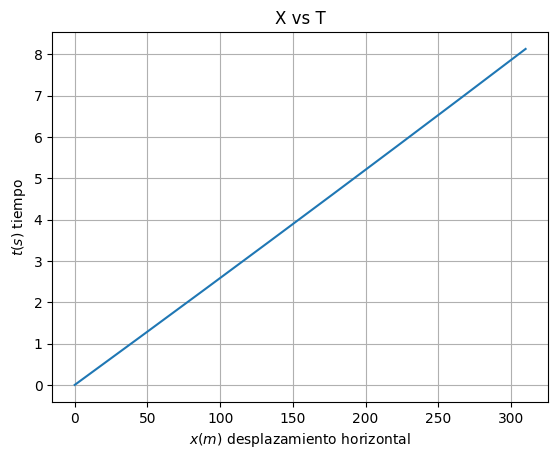

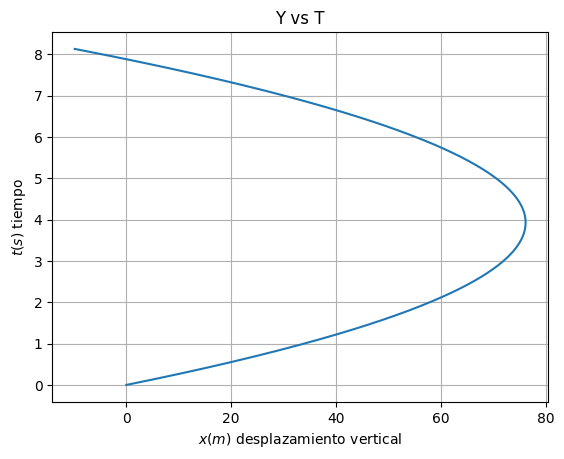

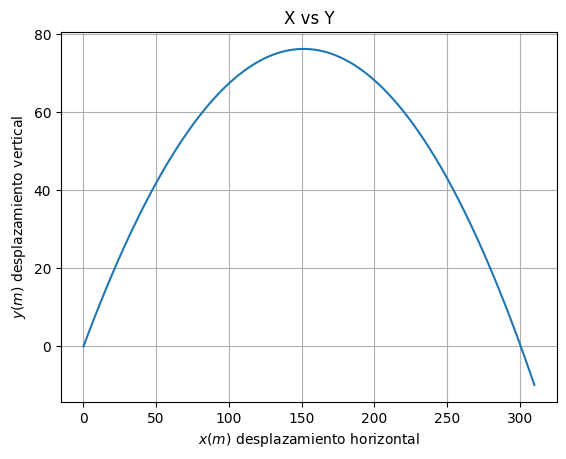

In [40]:
#Punto 4

x = np.linspace(0, 310,1000)
y = np.zeros(len(x))
t=np.zeros(len(x))

for i in range(len(x)):
  y[i]= f(x[i],0.785398,vx,vy,b,g)
  t[i] = tv(x[i],vx,b)


plt.plot(x,t)
plt.title( "X vs T" )
plt.xlabel("$x(m)$ desplazamiento horizontal")
plt.ylabel("$t(s)$ tiempo")
plt.grid()
plt.show()

plt.plot(y,t)
plt.title( "Y vs T" )
plt.xlabel("$x(m)$ desplazamiento vertical")
plt.ylabel("$t(s)$ tiempo")
plt.grid()
plt.show()

plt.plot(x,y)
plt.title( "X vs Y" )
plt.xlabel("$x(m)$ desplazamiento horizontal")
plt.ylabel("$y(m)$ desplazamiento vertical")
plt.grid()
plt.show()

In [54]:
from re import finditer
from ssl import VERIFY_X509_PARTIAL_CHAIN
theta=np.arange(0, 90, 5)
theta=np.deg2rad(theta)

v0=40
b=000.9

Rn=np.zeros(len(theta))
vxn=np.zeros(len(theta))
vyn=np.zeros(len(theta))
fn = []

for i in range(len(theta)):
  vxn[i]=v0*np.cos(theta[i])
  vyn[i]=v0*np.sin(theta[i])


for i in range(len(theta)):
  fn[i]= lambda R,vxn[i],vyn[i],b,g: ((g/b) + vy)*(R/vx) + g/(b**2) * np.log(1-(R*b/vx))

  fn.append(biseccion(f,0,310,1e-10))

print(f)





SyntaxError: invalid syntax (<ipython-input-54-022fc0d7260b>, line 20)